 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [4]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [5]:
# Reading whale returns
whale_returns = pd.read_csv('whale_returns.csv')
whale_returns.set_index(pd.to_datetime(whale_returns["Date"], infer_datetime_format=True), inplace=True)
whale_returns.drop(columns=['Date'], inplace=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [6]:
# Count nulls
whale_returns.isnull()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,True,True,True,True
2015-03-03,False,False,False,False
2015-03-04,False,False,False,False
2015-03-05,False,False,False,False
2015-03-06,False,False,False,False
...,...,...,...,...
2019-04-25,False,False,False,False
2019-04-26,False,False,False,False
2019-04-29,False,False,False,False


In [7]:
# Drop nulls
whale_returns = whale_returns.dropna()

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [8]:
# Reading algorithmic returns
algo_returns = pd.read_csv('algo_returns.csv')
algo_returns.set_index(pd.to_datetime(algo_returns["Date"], infer_datetime_format=True), inplace=True)
algo_returns.drop(columns=['Date'], inplace=True)

In [9]:
# Count nulls
algo_returns.isnull()

,Algo 1,Algo 2
Date,,
2014-05-28,False,True
2014-05-29,False,True
2014-05-30,False,True
2014-06-02,False,True
2014-06-03,False,True
...,...,...
2019-04-25,False,False
2019-04-26,False,False
2019-04-29,False,False


In [10]:
# Drop nulls
algo_returns = algo_returns.dropna()
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [11]:
# Reading S&P 500 Closing Prices
sp500_returns = pd.read_csv('sp500_history.csv')
sp500_returns.set_index(pd.to_datetime(sp500_returns["Date"], infer_datetime_format=True), inplace=True)
sp500_returns.drop(columns=['Date'], inplace=True)

In [12]:
# Check Data Types
sp500_returns.dtypes

Close    object
dtype: object

In [13]:
# Fix Data Types
sp500_returns["Close"] = sp500_returns["Close"].str.replace("$","")
sp500_returns["Close"] = sp500_returns["Close"].astype("float")

<ipython-input-13-3c848b6f438f>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp500_returns["Close"] = sp500_returns["Close"].str.replace("$","")


In [14]:
# Calculate Daily Returns
sp500_daily = (sp500_returns - sp500_returns.shift(1))/sp500_returns.shift(1)
sp500_daily.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [15]:
# Drop nulls
sp500_daily = sp500_daily.dropna()

In [16]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily = sp500_daily.rename(columns={"Close": "SP500 Close"})
sp500_daily

,SP500 Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


## Combine Whale, Algorithmic, and S&P 500 Returns

In [17]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
all_pfs = pd.concat([whale_returns, algo_returns, sp500_daily], axis="columns", join="inner")
all_pfs

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

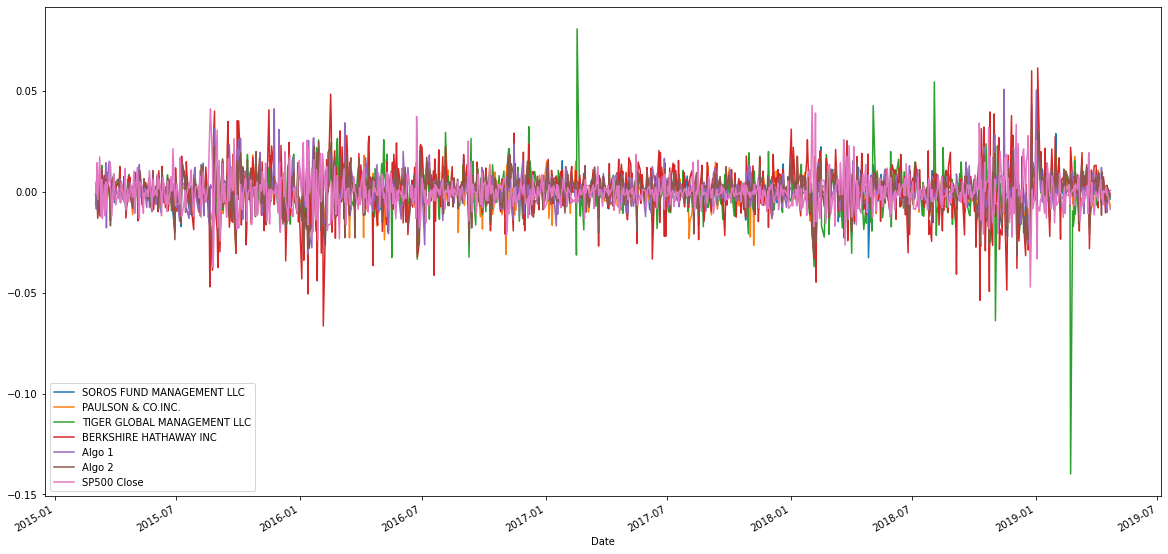

In [18]:
# Plot daily returns of all portfolios
all_returns=all_pfs.pct_change()
all_pfs.plot(figsize=(20,10))

#### Calculate and Plot cumulative returns.

In [19]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + all_pfs).cumprod()
cumulative_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Close
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,1.004408
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,1.003208
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,1.017632
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,1.013634
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,1.031123
...,...,...,...,...,...,...,...
2019-04-15,1.157839,0.786506,0.862797,1.525584,1.958591,1.264103,0.725056
2019-04-16,1.160965,0.786811,0.862080,1.526861,1.944990,1.267768,0.726708
2019-04-17,1.157602,0.781723,0.858279,1.531781,1.924954,1.261140,0.725562


<AxesSubplot:xlabel='Date'>

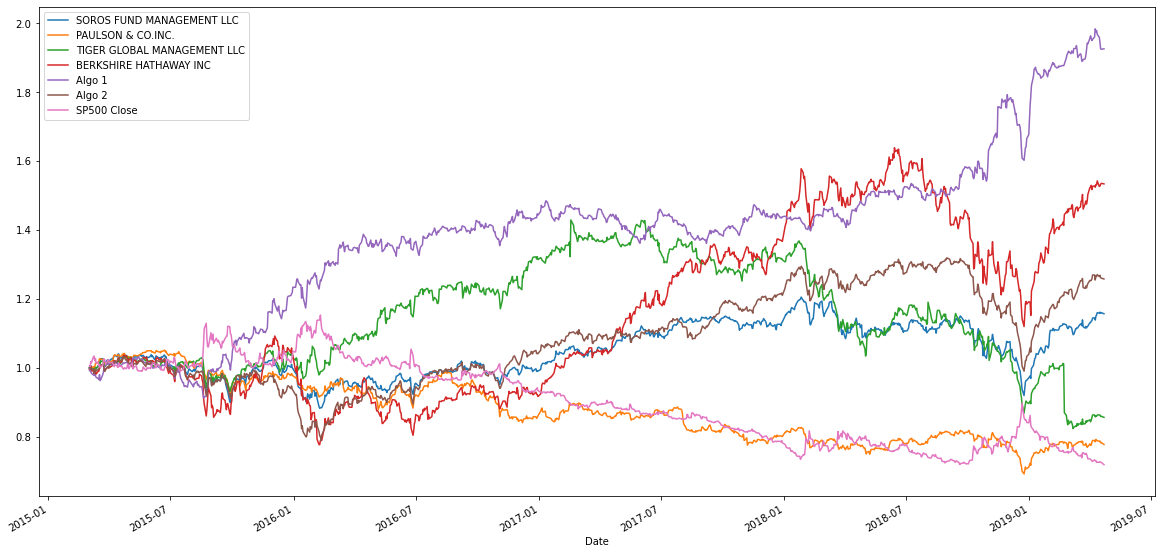

In [20]:
# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

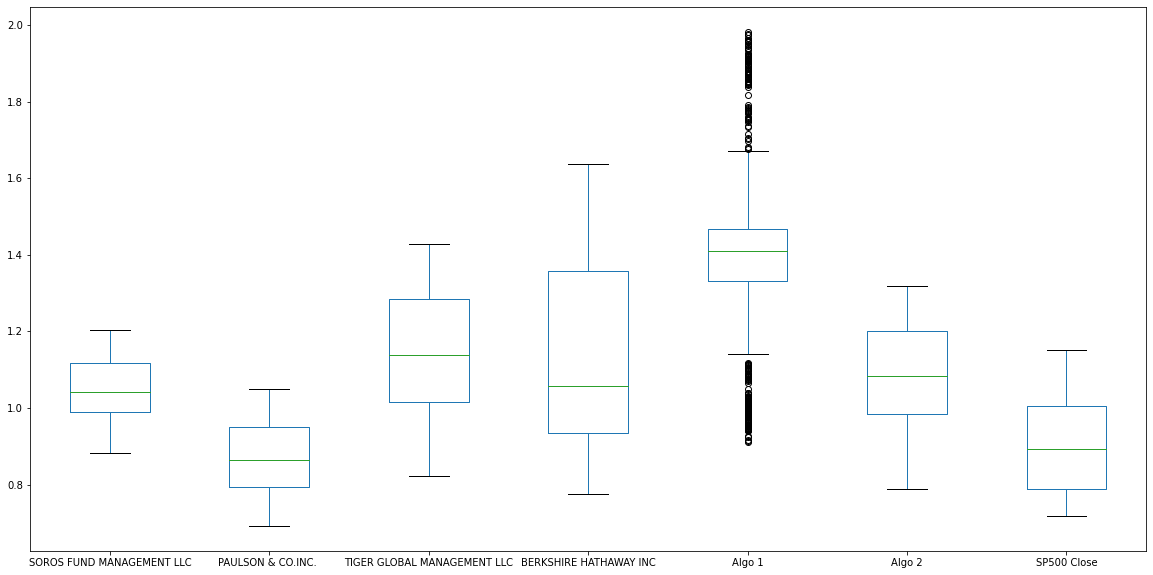

In [21]:
# Box plot to visually show risk
cumulative_returns.plot.box(figsize=(20,10))

### Calculate Standard Deviations

In [22]:
# Calculate the daily standard deviations of all portfolios
all_std = cumulative_returns.std()
all_std

SOROS FUND MANAGEMENT LLC      0.073187
PAULSON & CO.INC.              0.088447
TIGER GLOBAL MANAGEMENT LLC    0.149652
BERKSHIRE HATHAWAY INC         0.241382
Algo 1                         0.231772
Algo 2                         0.131642
SP500 Close                    0.114846
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [23]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = sp500_returns.std()
# Determine which portfolios are riskier than the S&P 500
for fund in all_std:
    if fund > all_std['SP500 Close']:
        print(fund)        

0.14965240646521
0.24138198116487838
0.23177178454046238
0.13164225990327413


In [102]:
# Tiger, BRK, Algo1, and Algo2 are all risker than the SP500

### Calculate the Annualized Standard Deviation

In [24]:
# Calculate the annualized standard deviation (252 trading days)
volatility = cumulative_returns.std() * np.sqrt(252)
volatility

SOROS FUND MANAGEMENT LLC      1.161806
PAULSON & CO.INC.              1.404053
TIGER GLOBAL MANAGEMENT LLC    2.375658
BERKSHIRE HATHAWAY INC         3.831820
Algo 1                         3.679263
Algo 2                         2.089756
SP500 Close                    1.823124
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

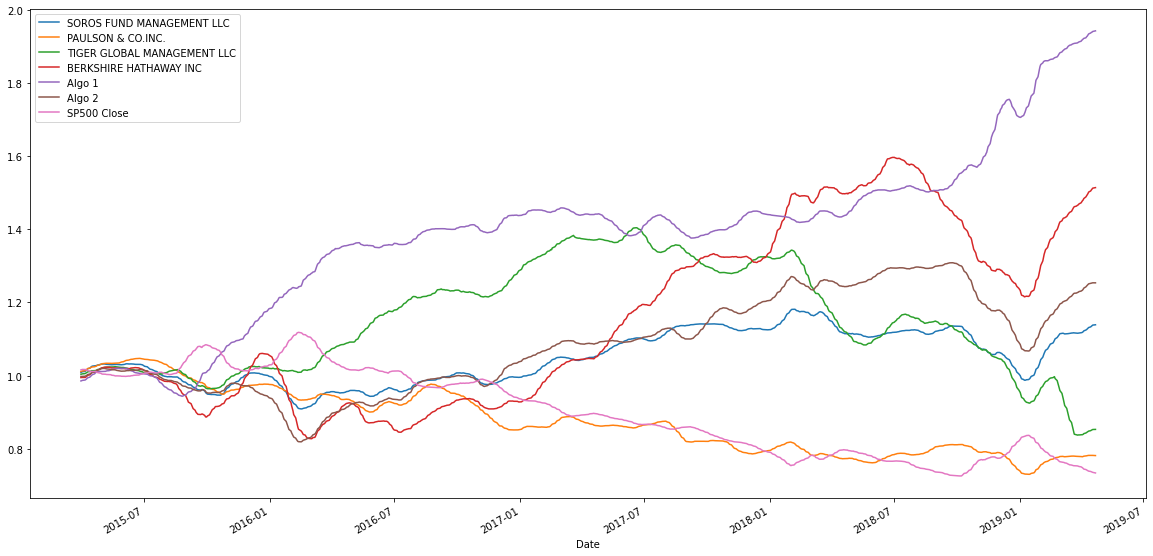

In [25]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std=cumulative_returns.rolling(window=21).mean()
# Plot the rolling standard deviation
rolling_std.plot(figsize=(20,10))

### Calculate and plot the correlation

In [26]:
# Calculate the correlation
correlation = cumulative_returns.corr()
# Display de correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Close
SOROS FUND MANAGEMENT LLC,1.000000,-0.652630,0.331582,0.898649,0.468415,0.915000,-0.883445
PAULSON & CO.INC.,-0.652630,1.000000,-0.196056,-0.780294,-0.830854,-0.766890,0.859080
TIGER GLOBAL MANAGEMENT LLC,0.331582,-0.196056,1.000000,0.034734,0.057241,0.180681,-0.196116
BERKSHIRE HATHAWAY INC,0.898649,-0.780294,0.034734,1.000000,0.578256,0.945409,-0.923948
Algo 1,0.468415,-0.830854,0.057241,0.578256,1.000000,0.587959,-0.742933
Algo 2,0.915000,-0.766890,0.180681,0.945409,0.587959,1.000000,-0.962617
SP500 Close,-0.883445,0.859080,-0.196116,-0.923948,-0.742933,-0.962617,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [101]:
# Calculate covariance of a single portfolio
covariance = cumulative_returns['Algo 1'].cov(cumulative_returns['SP500 Close'])
# Calculate variance of S&P 500
variance = cumulative_returns['SP500 Close'].var()
# Computing beta
algo_1_beta = covariance/variance
# Plot beta trend
algo_1_beta

-1.4993188348621016

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'Rolling 21-Day Beta of Algo 1'}, xlabel='Date'>

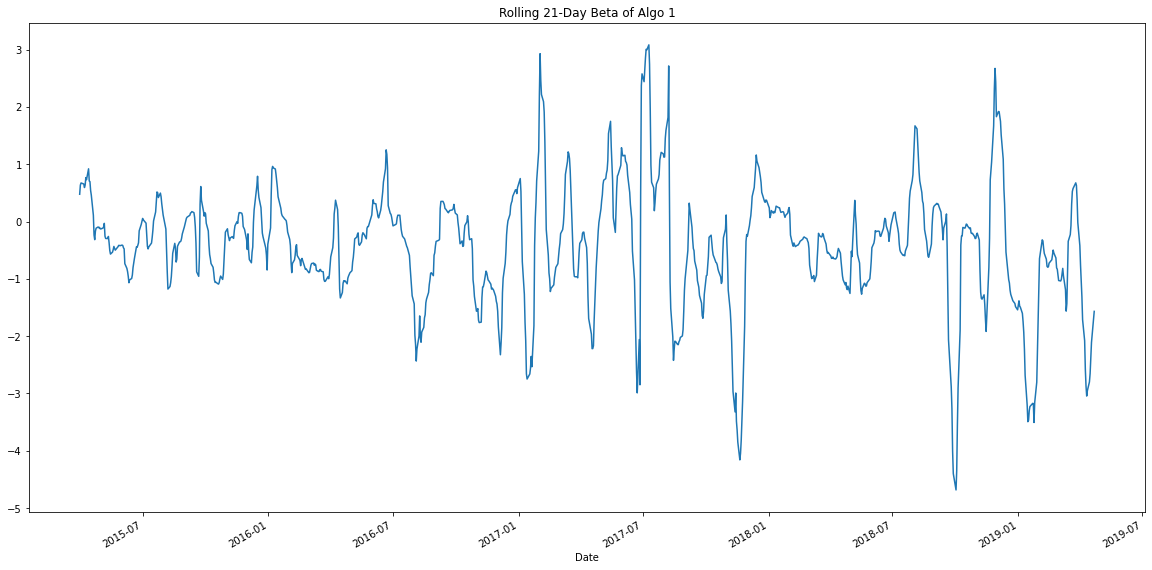

In [28]:
# Use `ewm` to calculate the rolling window
rolling_covariance = cumulative_returns['Algo 1'].rolling(window=21).cov(cumulative_returns['SP500 Close'])
rolling_variance = cumulative_returns['SP500 Close'].rolling(window=21).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20,10), title='Rolling 21-Day Beta of Algo 1')

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [29]:
# Annualized Sharpe Ratios
sharpe_ratios = (cumulative_returns.mean() * 252) / (cumulative_returns.std()*np.sqrt(252))

<AxesSubplot:title={'center':'Sharpe Ratios'}>

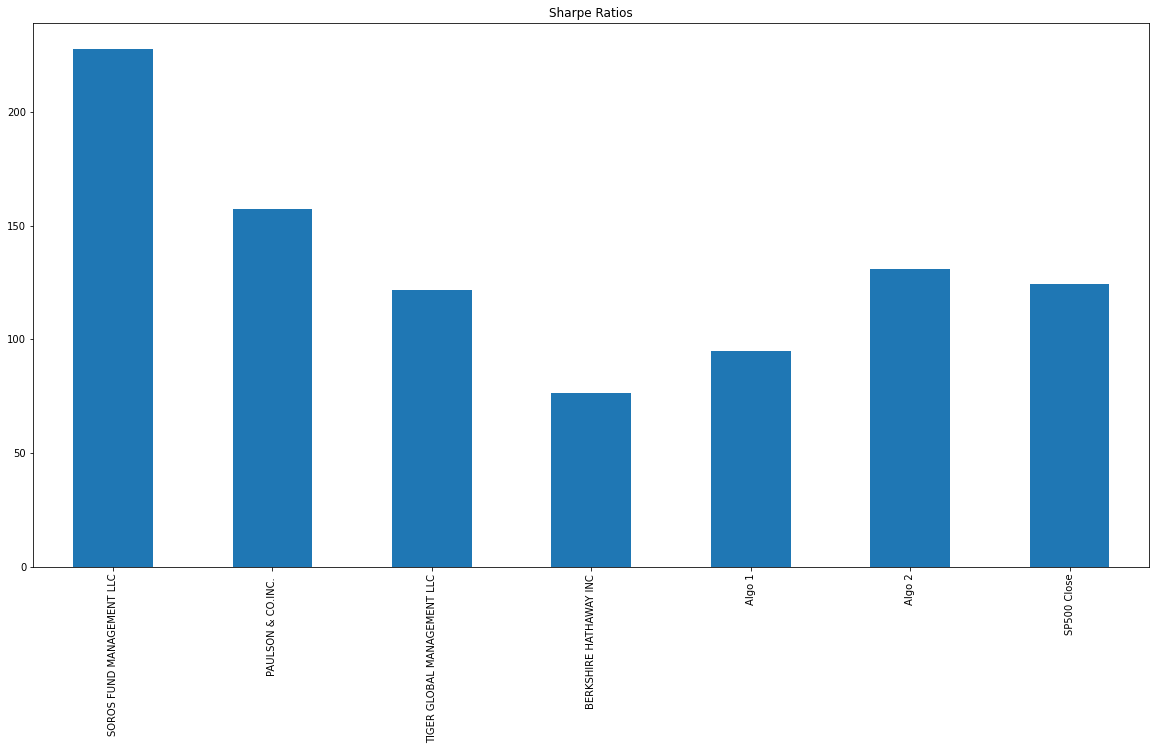

In [30]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar', figsize=(20,10), title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

--- Algo1 is providing the overall best return and Algo2 is outperforming all other portfolios with the exception of Berkshire Hathaway. Their sharpe ratios are fairly consistent with the competing portfolios though they seem to indicate that Algo2 is better diversified than Algo1. Algo1 only carries slightly more risk then the least volitile portfolio, Paulson. 

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [79]:
# Reading data from 1st stock
goog_path = Path('goog_historical.csv')
goog_data = pd.read_csv(goog_path, parse_dates=True, index_col="Trade DATE", infer_datetime_format=True)
goog_data = goog_data.rename(columns={"NOCP": "GOOG"})
goog_data = goog_data.drop(columns="Symbol")
goog_data.head()

,GOOG
Trade DATE,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40


In [33]:
# Reading data from 2nd stock
aapl_path = Path('aapl_historical.csv')
aapl_data = pd.read_csv(aapl_path, parse_dates=True, index_col="Trade DATE", infer_datetime_format=True)
aapl_data = aapl_data.rename(columns={"NOCP": "AAPL"})
aapl_data = aapl_data.drop(columns="Symbol")
aapl_data.head()

,AAPL
Trade DATE,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75


In [34]:
# Reading data from 3rd stock
cost_path = Path('cost_historical.csv')
cost_data = pd.read_csv(cost_path, parse_dates=True, index_col="Trade DATE", infer_datetime_format=True)
cost_data = cost_data.rename(columns={"NOCP": "COST"})
cost_data = cost_data.drop(columns="Symbol")
cost_data.head()

,COST
Trade DATE,
2019-05-09,243.47
2019-05-08,241.34
2019-05-07,240.18
2019-05-06,244.23
2019-05-03,244.62


In [35]:
# Combine all stocks in a single DataFrame
all_stock_data = pd.concat([goog_data, aapl_data, cost_data], axis='columns', join='inner')
all_stock_data.head()

,GOOG,AAPL,COST
Trade DATE,,,
2019-05-09,1162.38,200.72,243.47
2019-05-08,1166.27,202.90,241.34
2019-05-07,1174.10,202.86,240.18
2019-05-06,1189.39,208.48,244.23
2019-05-03,1185.40,211.75,244.62


In [85]:
# Reset Date index
all_stock_data = all_stock_data.sort_values("Trade DATE", ascending=True)
all_stock_data.head()

,GOOG,AAPL,COST
Trade DATE,,,
2018-05-11,1098.26,188.59,195.76
2018-05-14,1100.20,188.15,195.88
2018-05-15,1079.23,186.44,195.48
2018-05-16,1081.77,188.18,198.71
2018-05-17,1078.59,186.99,199.60


In [37]:
# Reorganize portfolio data by having a column per symbol


In [86]:
all_stock_data.dtypes

GOOG    float64
AAPL    float64
COST    float64
dtype: object

In [87]:
# Calculate daily returns
custom_return_daily = all_stock_data.pct_change()
custom_return_daily.head()
# Drop NAs
custom_return_daily = custom_return_daily.dropna()

# Display sample data
custom_return_daily.head()

,GOOG,AAPL,COST
Trade DATE,,,
2018-05-14,0.001766,-0.002333,0.000613
2018-05-15,-0.019060,-0.009088,-0.002042
2018-05-16,0.002354,0.009333,0.016523
2018-05-17,-0.002940,-0.006324,0.004479
2018-05-18,-0.011339,-0.003637,-0.003206


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [88]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
custom_return = custom_return_daily.dot(weights)

In [89]:
# Display sample data
custom_return

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
                ...   
2019-05-03    0.013329
2019-05-06   -0.004557
2019-05-07   -0.018798
2019-05-08   -0.000547
2019-05-09   -0.001751
Length: 249, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [90]:
# Join your returns DataFrame to the original returns DataFrame
new_returns = pd.concat([custom_return, all_pfs], axis='columns', join='inner') 
columns = ["Custom", "Soros", "Paulson", "Tiger Global", "Berkshire Hathaway", "Algo1", "Algo2", "SP500"]
new_returns.columns = columns

<AxesSubplot:>

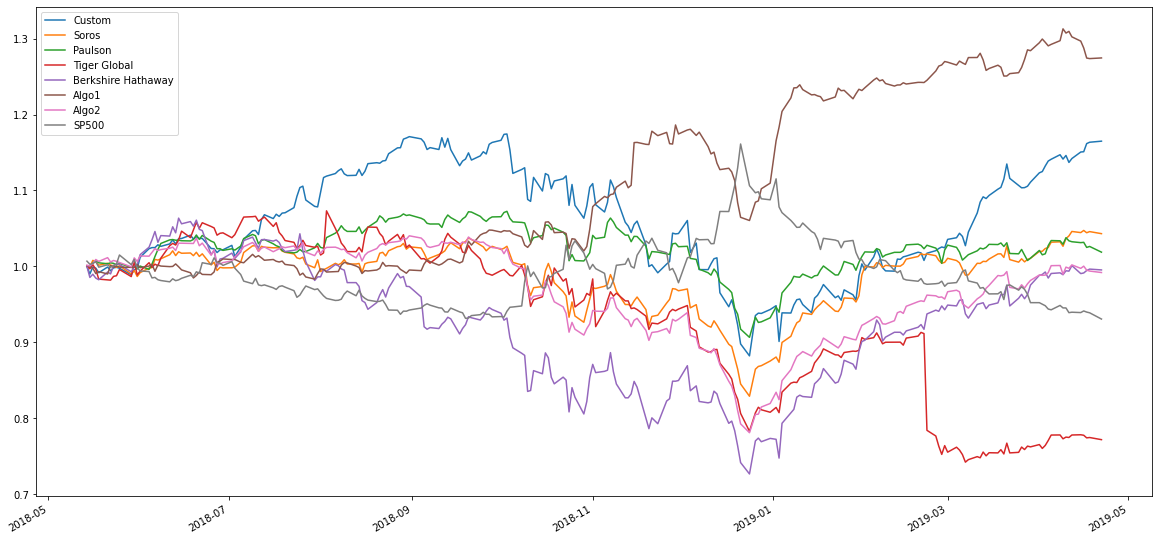

In [93]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
new_returns.replace([np.inf, -np.inf], np.nan, inplace=True)
new_returns = new_returns.dropna()
new_returns_cumulative = (1 + new_returns).cumprod()
new_returns_cumulative.plot(figsize=(20, 10))


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [94]:
# Calculate the annualized `std`
returns_std = new_returns.std()
annualized_std = returns_std * np.sqrt(252)
annualized_std

Custom                0.211627
Soros                 0.146812
Paulson               0.116928
Tiger Global          0.232898
Berkshire Hathaway    0.247305
Algo1                 0.133927
Algo2                 0.139499
SP500                 0.152469
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

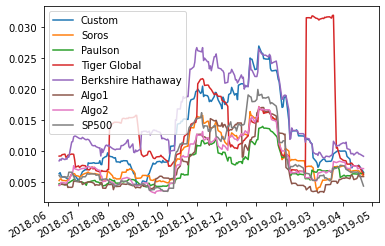

In [95]:
# Calculate rolling standard deviation
rolling_std = new_returns.rolling(window=21).std()
# Plot rolling standard deviation
rolling_std.plot()

### Calculate and plot the correlation

<AxesSubplot:>

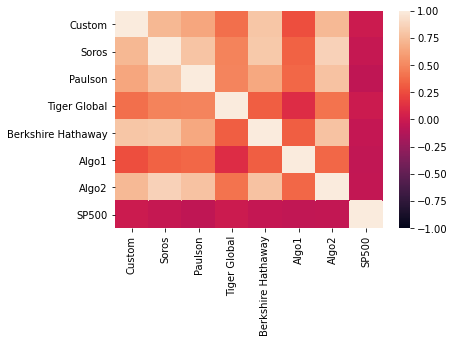

In [96]:
# Calculate and plot the correlation
price_correlation = new_returns.corr()
sns.heatmap(price_correlation, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Rolling 21-Day Beta of Custom Portfolio'}>

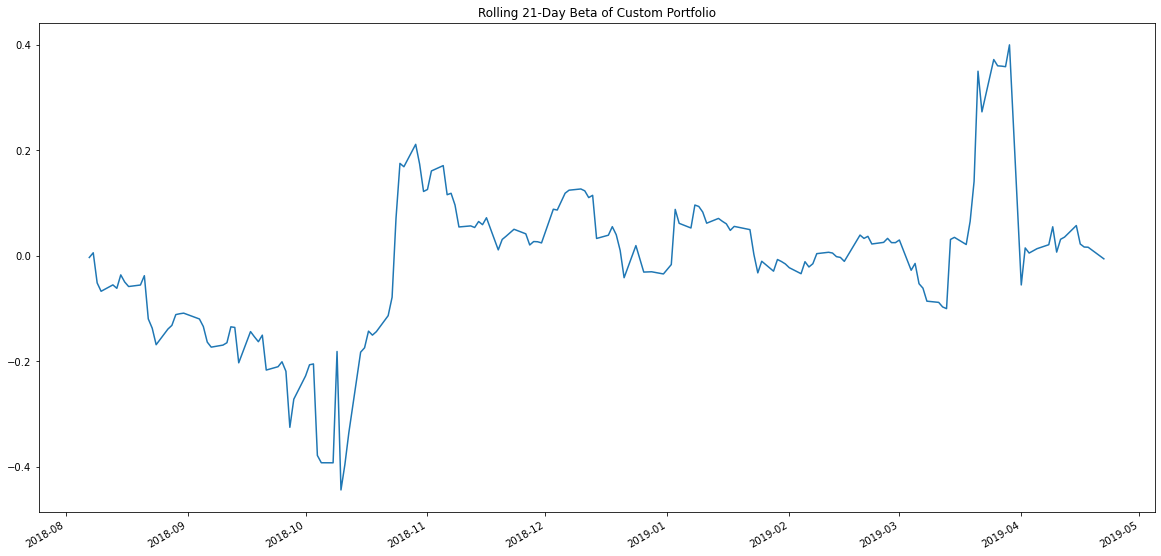

In [97]:
# Calculate and plot Beta
new_rolling_covariance = new_returns['Custom'].rolling(window=60).cov(new_returns['SP500'])
new_rolling_variance = new_returns['SP500'].rolling(window=60).var()
new_rolling_beta = new_rolling_covariance / new_rolling_variance
new_rolling_beta.plot(figsize=(20,10), title='Rolling 21-Day Beta of Custom Portfolio')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [98]:
# Calculate Annualzied Sharpe Ratios
new_sharpe_ratios = (new_returns.mean() * 252) / (new_returns.std()*np.sqrt(252))
new_sharpe_ratios

Custom                0.876152
Soros                 0.380007
Paulson               0.227577
Tiger Global         -1.066635
Berkshire Hathaway    0.103006
Algo1                 2.001260
Algo2                 0.007334
SP500                -0.427676
dtype: float64

<AxesSubplot:>

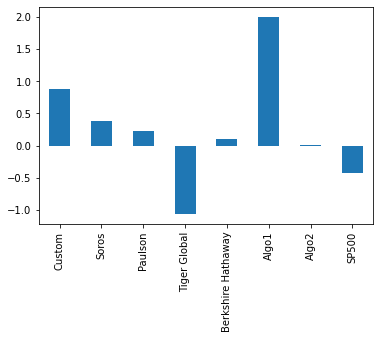

In [99]:
# Visualize the sharpe ratios as a bar plot
new_sharpe_ratios.plot.bar()

### How does your portfolio do?

Write your answer here!

In [ ]:
# Our simple custom portfolio performed very well. It provided very competetive returns and had the second lowest volatility level of all of the portfolios